Current Weather Data:
       City  Temperature (°C)  Humidity (%)
0  New York             28.55            60
1     Tokyo             22.46            65


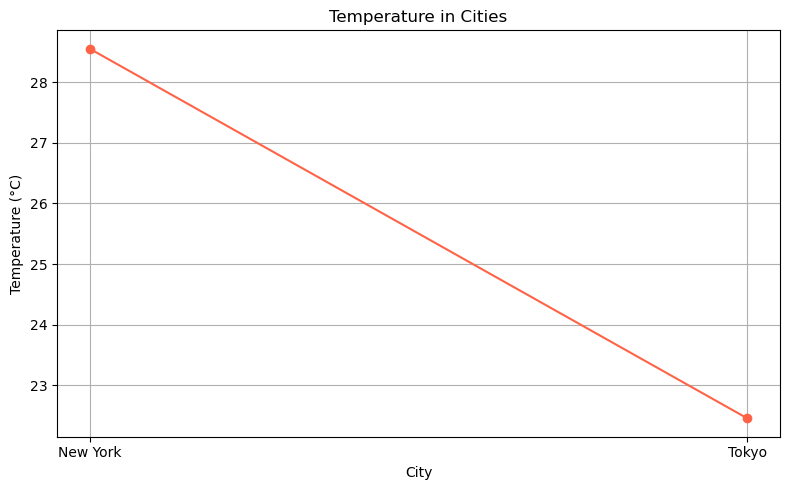

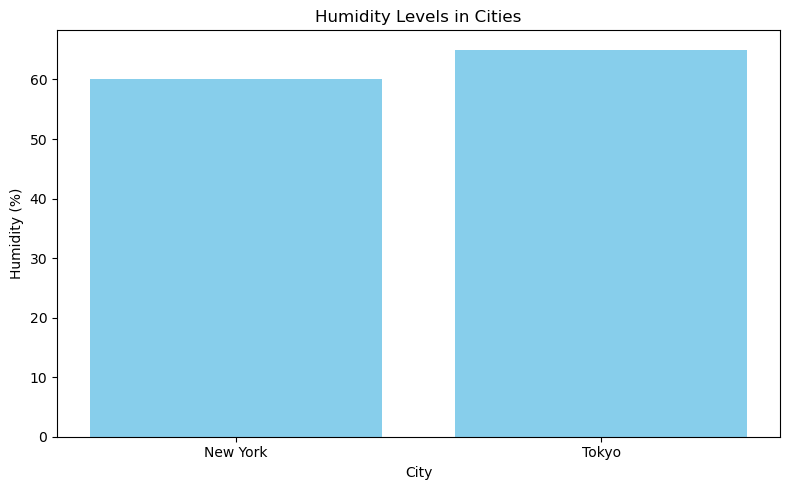

In [2]:
# Step 1: Import required libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
from dotenv import load_dotenv

# Step 2: Load environment variables from .env file
load_dotenv()
api_key = os.getenv("OPENWEATHERMAP_API_KEY")
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Step 3: List of cities to retrieve data for
cities = ["New York", "Tokyo"]
weather_data = []

# Step 4: Make API requests with error handling and retry mechanism
for city in cities:
    try:
        params = {
            "q": city,
            "appid": api_key,
            "units": "metric"
        }
        response = requests.get(base_url, params=params)

        # Check for rate limit (status code 429) or other errors
        if response.status_code == 429:
            print("Rate limit exceeded. Waiting before retrying...")
            time.sleep(10)  # Wait and retry
            response = requests.get(base_url, params=params)

        if response.status_code == 200:
            data = response.json()
            weather_data.append({
                "City": city,
                "Temperature (°C)": data["main"]["temp"],
                "Humidity (%)": data["main"]["humidity"]
            })
        else:
            print(f"Failed to retrieve data for {city}: {response.status_code} - {response.json().get('message')}")
    except Exception as e:
        print(f"An error occurred for {city}: {e}")

# Step 5: Convert to DataFrame
df = pd.DataFrame(weather_data)
print("Current Weather Data:")
print(df)

# Step 6: Line plot - Temperature
plt.figure(figsize=(8, 5))
plt.plot(df["City"], df["Temperature (°C)"], marker='o', linestyle='-', color='tomato')
plt.title("Temperature in Cities")
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.savefig("lineplot.png")
plt.show()

# Step 7: Bar chart - Humidity
plt.figure(figsize=(8, 5))
plt.bar(df["City"], df["Humidity (%)"], color='skyblue')
plt.title("Humidity Levels in Cities")
plt.xlabel("City")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.savefig("barchart.png")
plt.show()
